<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/MNIST_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import fetch_openml
import pandas as pd


In [7]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
X, y= mnist.data,mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
import matplotlib.pyplot as plt


In [12]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

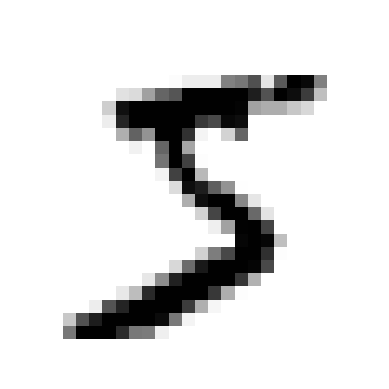

In [14]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [15]:
y[0]

'5'

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],X[:60000], X[60000:]

#Training a Binary Classifier

In [20]:
y_train_s = (y_train =='5') # True for all ss, False for all other digits
y_test_s = (y_test =='5')

# The SGDC is able to handle large dataset efficiently.It deals with training instances independently and suitable for online learning

In [28]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd_clf = SGDClassifier()

NameError: name 'y_train_5' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Training accuracy: 0.9745892857142857
Testing accuracy: 0.9697142857142858

Classification Report (Test Data):
               precision    recall  f1-score   support

       False       0.98      0.99      0.98     12727
        True       0.88      0.78      0.82      1273

    accuracy                           0.97     14000
   macro avg       0.93      0.88      0.90     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix (Test Data):
 [[12588   139]
 [  285   988]]


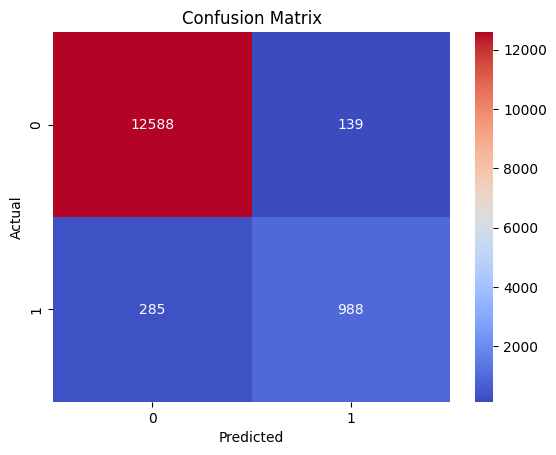

In [33]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Display the structure of the dataset
print(mnist.keys())

# Features and target
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale the data (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier
sgd_clf.fit(X_train_scaled, y_train)

# Predict using the trained classifier
y_train_pred = sgd_clf.predict(X_train_scaled)
y_test_pred = sgd_clf.predict(X_test_scaled)

# Evaluate the classifier
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Features and target
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Scale the data (important for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [43]:
# Evaluate the classifier using cross-validation
cross_val_scores = cross_val_score(sgd_clf, X_scaled, y_binary, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

Cross-validation scores: [0.973      0.97078571 0.96592857 0.96692857 0.9725    ]
Mean cross-validation score: 0.9698285714285714
